In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature
import numpy as np
from datetime import datetime

In [ ]:
def create_yaml():

    create_yml_file = open('one_time_config.yml', 'w')

    one_time_login_text ='''database:
        username: "USER1"
        password: "Standard12345!!"
        sysdba : "n"
        host: "db202006051320_high"
        '''

    create_yml_file.write(one_time_login_text)

    create_yml_file.close()

    print ("'one_time_config.yml'이 생겼습니다.")
    print ("'conn = conn_DB()' 로 접속하세요.")

    pass # create_yaml

In [ ]:

def conn_DB():
    try :
        conn = pt.open_connection('one_time_config.yml')
        print ("pt.query_to_df(<query문>, conn)으로 사용하세요.")
        print ("프로그램 종료 전 반드시 disconn_DB(conn)하세요!")
        return conn
        pass # try

    except :
        print ("예외가 발생했습니다.")
        return None
        pass # except
    
    pass # conn_DB

In [ ]:


create_yaml()

In [ ]:
conn = conn_DB()

In [110]:


from datetime import datetime

In [55]:
# 도보이동형 선별 진료소 시행  (2020-02-26 시행 시작)
# 주요 입국절차 Immigration 정책 시행 : 13-14주
        # 4월 1일 : 14일 자가 격리 정책 시작
        # 4월 13일 : 자가 격리 및 자가 진단 정책 시작 

In [56]:
# patientinfo 파일에서 불러왔습니다

In [81]:
sql1 = "select * from PATIENTINFO where COUNTRY='Korea' and CONFIRMED_DATE>='2020-01-23' order by CONFIRMED_DATE"

In [82]:
df_tables = pt.query_to_df(sql1, conn)

df_tables

,PATIENT_ID,SEX,AGE,COUNTRY,PROVINCE,CITY,INFECTION_CASE,INFECTED_BY,CONTACT_NUMBER,CONFIRMED_DATE,RELEASED_DATE,DECEASED_DATE,STATE
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,None,75,2020-01-23,2020-02-05,None,released
1,2000000001,male,50s,Korea,Gyeonggi-do,Goyang-si,overseas inflow,None,16,2020-01-26,2020-02-12,None,released
2,2000000002,male,50s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,None,95,2020-01-27,2020-02-09,None,released
3,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,2020-01-30,2020-02-19,None,released
4,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,None,9,2020-01-30,2020-02-15,None,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1500000119,female,70s,Korea,Daejeon,Seo-gu,etc,None,None,2020-06-30,None,None,isolated
5116,1400000343,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated
5117,1500000121,male,10s,Korea,Daejeon,Dong-gu,contact with patient,1500000115,3,2020-06-30,None,None,isolated
5118,1400000342,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated


In [83]:
pwd

'/home/hannahanmin/Workspace'

In [84]:
# to_datetime 함수를 이용해서 원래 object type ['CONFIRMED_NUMBER']를 datetime64[ns]로 바꾸고
# ['latest_confirmed'] 컬럼으로 새로 추가했습니다
df_tables['latest_confirmed']=pd.to_datetime(df_tables['CONFIRMED_DATE'])
df_tables

,PATIENT_ID,SEX,AGE,COUNTRY,PROVINCE,CITY,INFECTION_CASE,INFECTED_BY,CONTACT_NUMBER,CONFIRMED_DATE,RELEASED_DATE,DECEASED_DATE,STATE,latest_confirmed
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,None,75,2020-01-23,2020-02-05,None,released,2020-01-23
1,2000000001,male,50s,Korea,Gyeonggi-do,Goyang-si,overseas inflow,None,16,2020-01-26,2020-02-12,None,released,2020-01-26
2,2000000002,male,50s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,None,95,2020-01-27,2020-02-09,None,released,2020-01-27
3,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,2020-01-30,2020-02-19,None,released,2020-01-30
4,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,None,9,2020-01-30,2020-02-15,None,released,2020-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1500000119,female,70s,Korea,Daejeon,Seo-gu,etc,None,None,2020-06-30,None,None,isolated,2020-06-30
5116,1400000343,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated,2020-06-30
5117,1500000121,male,10s,Korea,Daejeon,Dong-gu,contact with patient,1500000115,3,2020-06-30,None,None,isolated,2020-06-30
5118,1400000342,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated,2020-06-30


In [85]:
#확인용
df_tables['CONFIRMED_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
                                                           


0      2020-01-23
1      2020-01-26
2      2020-01-27
3      2020-01-30
4      2020-01-30
          ...    
5115   2020-06-30
5116   2020-06-30
5117   2020-06-30
5118   2020-06-30
5119   2020-06-30
Name: CONFIRMED_DATE, Length: 5120, dtype: datetime64[ns]

In [86]:
type(df_tables.CONFIRMED_DATE)

pandas.core.series.Series

In [87]:
df_tables

,PATIENT_ID,SEX,AGE,COUNTRY,PROVINCE,CITY,INFECTION_CASE,INFECTED_BY,CONTACT_NUMBER,CONFIRMED_DATE,RELEASED_DATE,DECEASED_DATE,STATE,latest_confirmed
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,None,75,2020-01-23,2020-02-05,None,released,2020-01-23
1,2000000001,male,50s,Korea,Gyeonggi-do,Goyang-si,overseas inflow,None,16,2020-01-26,2020-02-12,None,released,2020-01-26
2,2000000002,male,50s,Korea,Gyeonggi-do,Pyeongtaek-si,overseas inflow,None,95,2020-01-27,2020-02-09,None,released,2020-01-27
3,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,2020-01-30,2020-02-19,None,released,2020-01-30
4,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,None,9,2020-01-30,2020-02-15,None,released,2020-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,1500000119,female,70s,Korea,Daejeon,Seo-gu,etc,None,None,2020-06-30,None,None,isolated,2020-06-30
5116,1400000343,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated,2020-06-30
5117,1500000121,male,10s,Korea,Daejeon,Dong-gu,contact with patient,1500000115,3,2020-06-30,None,None,isolated,2020-06-30
5118,1400000342,female,None,Korea,Incheon,None,overseas inflow,None,None,2020-06-30,None,None,isolated,2020-06-30


In [88]:
pwd

'/home/hannahanmin/Workspace'

In [89]:
dir(df_tables.latest_confirmed.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'st

In [90]:
#['latest_confirmed'] 확진 판정 날짜를 '주'별 단위를 부여했습니다. 
#dt.week를 사용(dt는 datetime의 권한자(?)), 
df_tables.latest_confirmed.dt.week

0        4
1        4
2        5
3        5
4        5
        ..
5115    27
5116    27
5117    27
5118    27
5119    27
Name: latest_confirmed, Length: 5120, dtype: int64

In [91]:
#주별 변화를 보기 위해 ['week_number']라는 컬럼을 따로 넣음
df_tables['week_number'] = df_tables.latest_confirmed.dt.weekofyear

In [92]:
del df_tables['SEX']

In [93]:
del df_tables['COUNTRY']

In [94]:
del df_tables['INFECTION_CASE']

In [95]:
del df_tables['INFECTED_BY']

In [96]:
del df_tables['CONTACT_NUMBER']

In [97]:
del df_tables['RELEASED_DATE']

In [98]:
del df_tables['DECEASED_DATE']

In [99]:
del df_tables['STATE']

In [100]:
del df_tables['CONFIRMED_DATE']

In [101]:
del df_tables['PROVINCE']

In [102]:
NJ=df_tables

In [103]:
NJ

,PATIENT_ID,AGE,CITY,latest_confirmed,week_number
0,1000000001,50s,Gangseo-gu,2020-01-23,4
1,2000000001,50s,Goyang-si,2020-01-26,4
2,2000000002,50s,Pyeongtaek-si,2020-01-27,5
3,1000000003,50s,Jongno-gu,2020-01-30,5
4,1000000004,20s,Mapo-gu,2020-01-30,5
...,...,...,...,...,...
5115,1500000119,70s,Seo-gu,2020-06-30,27
5116,1400000343,None,None,2020-06-30,27
5117,1500000121,10s,Dong-gu,2020-06-30,27
5118,1400000342,None,None,2020-06-30,27


In [104]:
NJ.to_csv("NJ.csv")

In [156]:
grouped = df_tables['PROVINCE'].groupby(df_tables['week_number'])
grouped

In [158]:
#주별 해외유입 사례
grouped.size()

week_number
9       4
10      3
11     15
12     72
13    172
14    169
15     69
16     33
17     21
18     23
19     14
20     22
21     20
22     30
23     16
24     22
25     41
26     39
27     10
Name: PROVINCE, dtype: int64

In [159]:
help(df_tables.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : scalar or array_like, optional
        The size of each point. Possible values are:
    
        - A 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


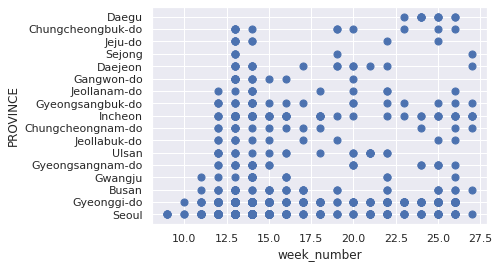

In [161]:
# scatter plot으로 각 province (주별)로 해외 유입 사례가 있었는지 확인
# week_number의 .5는 무시하셔도 될 것 같습니다
# 더 아름다운 plot 있으면 바꿔주세용

frame, grid = plt.subplots()
# df_tables.groupby(df_tables['PROVINCE']).count()['week_number'].unstack().plot(ax=grid)
# grid = df_tables[['week_number', 'latest_confirmed']].plot.hist(alpha=0.5, bins=30)


df_tables.plot.scatter(x='week_number', y='PROVINCE',s=50, ax=grid)

In [162]:
df_tables['year'], df_tables['month'], df_tables['day']=(df_tables['latest_confirmed'].dt.year,df_tables['latest_confirmed'].dt.month, df_tables['latest_confirmed'].dt.day)

df_tables.head()

,PATIENT_ID,SEX,AGE,COUNTRY,PROVINCE,CITY,INFECTION_CASE,INFECTED_BY,CONTACT_NUMBER,CONFIRMED_DATE,RELEASED_DATE,DECEASED_DATE,STATE,latest_confirmed,patient_released,week_number,recover_period,year,month,day
0,1000000052,male,30s,Korea,Seoul,Songpa-gu,overseas inflow,None,None,2020-02-27,2020-03-03,None,released,2020-02-27,2020-03-03,9,-5 days,2020,2,27
1,1000000085,female,30s,Korea,Seoul,Gangnam-gu,overseas inflow,None,None,2020-02-27,2020-03-17,None,released,2020-02-27,2020-03-17,9,-19 days,2020,2,27
2,1000000075,male,30s,Korea,Seoul,Gwangjin-gu,overseas inflow,None,None,2020-02-27,None,None,released,2020-02-27,NaT,9,NaT,2020,2,27
3,1000000082,male,60s,Korea,Seoul,Yeongdeungpo-gu,overseas inflow,None,None,2020-02-29,None,None,released,2020-02-29,NaT,9,NaT,2020,2,29
4,1000000103,male,20s,Korea,Seoul,Dongdaemun-gu,overseas inflow,None,None,2020-03-04,2020-03-20,None,released,2020-03-04,2020-03-20,10,-16 days,2020,3,4


In [163]:
help(df_tables.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index:bool=True, sort:bool=True, group_keys:bool=True, squeeze:bool=False, observed:bool=False) -> 'groupby_generic.DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the


In [164]:
help(grid.hist)

Help on method hist in module matplotlib.axes._axes:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *rang

In [ ]:
#위에 주별 해외 유입 사례 수를 histogram으로 표현해봤습니다
frame = plt.figure()
grid = frame.add_subplot()

grid.hist(df_tables['week_number'], bins=50)
grid.set_title('Histrogram of Imported Cases', fontsize=18)
plt.xlabel('Week Number', fontsize=18)
plt.ylabel('Number of Imported Cases', fontsize=18)
#immigrant policy (week 14 : 14 day quarantine, )


In [166]:
df_tables = df_tables.groupby(['PROVINCE', pd.Grouper(key='lastest_confirmed')])

KeyError: 'The grouper name lastest_confirmed is not found'

In [167]:
sns.set(style="darkgrid")

sns.lineplot(x="week_number", y="PROVINCE")


ValueError: Could not interpret input 'week_number'

In [168]:
df_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   PATIENT_ID        795 non-null    int64          
 1   SEX               633 non-null    object         
 2   AGE               612 non-null    object         
 3   COUNTRY           795 non-null    object         
 4   PROVINCE          795 non-null    object         
 5   CITY              777 non-null    object         
 6   INFECTION_CASE    795 non-null    object         
 7   INFECTED_BY       8 non-null      object         
 8   CONTACT_NUMBER    138 non-null    object         
 9   CONFIRMED_DATE    795 non-null    object         
 10  RELEASED_DATE     165 non-null    object         
 11  DECEASED_DATE     0 non-null      object         
 12  STATE             795 non-null    object         
 13  latest_confirmed  795 non-null    datetime64[ns] 
 14  patient_re

In [134]:
df_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   PATIENT_ID        795 non-null    int64          
 1   SEX               633 non-null    object         
 2   AGE               612 non-null    object         
 3   COUNTRY           795 non-null    object         
 4   PROVINCE          795 non-null    object         
 5   CITY              777 non-null    object         
 6   INFECTION_CASE    795 non-null    object         
 7   INFECTED_BY       8 non-null      object         
 8   CONTACT_NUMBER    138 non-null    object         
 9   CONFIRMED_DATE    795 non-null    object         
 10  RELEASED_DATE     165 non-null    object         
 11  DECEASED_DATE     0 non-null      object         
 12  STATE             795 non-null    object         
 13  latest_confirmed  795 non-null    datetime64[ns] 
 14  patient_re